In [1]:
import starepandas
import geopandas
import pandas
import cartopy
import pyproj
import cartopy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [2]:
lon_0_global = 180
lat_0_global = 90.0

geod_crs = cartopy.crs.Geodetic(globe=cartopy.crs.Globe())
polar_crs = cartopy.crs.LambertAzimuthalEqualArea(central_longitude=lon_0_global, central_latitude=lat_0_global, globe=cartopy.crs.Globe())

In [3]:
df = pandas.read_pickle('../tests/data/mcms_merra2_npac_2017_usi_tagrp_niklas.pkl')
df = df.drop(columns=['vert_poly_geo', 'verts'])
df = df.set_crs(polar_crs, allow_override=True)

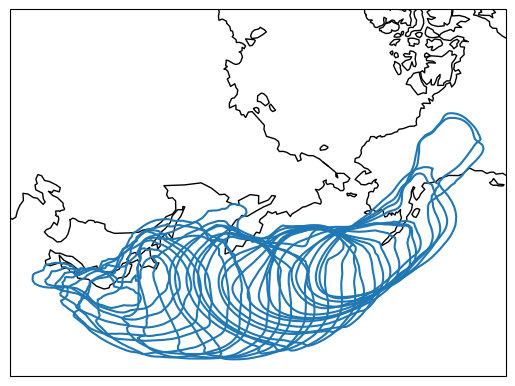

In [4]:
ax = plt.axes(projection=polar_crs)
df.boundary.plot(ax=ax)
ax.coastlines()
ax.plot([0.5, 0.5], [0,1])

# Find curious ones

<Axes: >

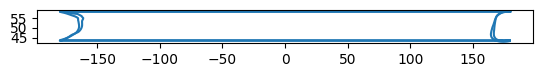

In [5]:
n = 20
broken = df.to_crs(4326).iloc[20:22]#.plot()
broken.boundary.plot()

<Axes: >

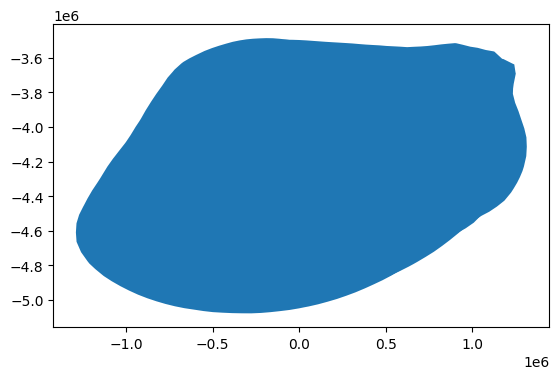

In [6]:
broken.to_crs(polar_crs).plot()

# Test if some are CW

In [7]:
polygons = df[df.geometry.geom_type=='Polygon']

In [8]:
def is_counterclockwise(polygon):
    return polygon.exterior.is_ccw

In [9]:
polygons.geometry.apply(is_counterclockwise)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
dtype: bool

In [10]:
polygons.to_crs(4326).geometry.apply(is_counterclockwise)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
dtype: bool

# Convert to STARE

In [30]:
sdf = starepandas.STAREDataFrame(polygons.to_crs(4326))
sids = sdf.make_sids(level=5, force_ccw=True)
sdf = sdf.set_sids(sids)
trixels = sdf.make_trixels(wrap_lon=False)
sdf = sdf.set_trixels(trixels)

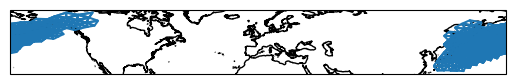

In [37]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())

sdf.split_antimeridian().plot(ax=ax)
ax.coastlines()

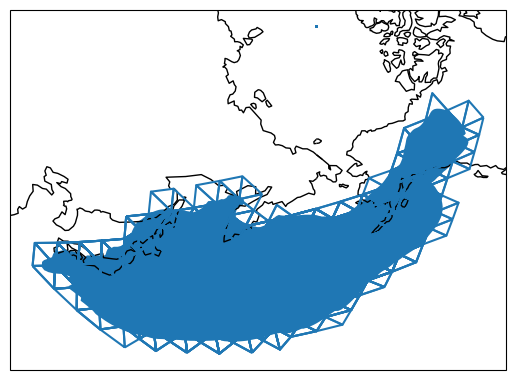

In [42]:
ax = plt.axes(projection=polar_crs)

sdf.split_antimeridian().plot(ax=ax)
polygons.plot(ax=ax)
sdf.set_geometry('trixels').to_crs(polar_crs).plot(ax=ax)
ax.coastlines()

,usi,uci,timestamp,lon,lat,cslp,ctype,cinten,ttype,tinten,depth,sarea,sa_fill,geometry,sids,trixels
0,20161127060534214500,20161127060534214500,2016-11-27 06:00:00,145.00,36.58,1009.155,MCCpe,2,CE-Type,3,NaN,532.0,"[135570, 135571, 135572, 135573, 136145, 13614...","POLYGON ((131.25000 27.30272, 131.56260 27.281...","[902971725287784453, 903534675241205765, 90409...","MULTIPOLYGON (((-3520281.107 -5060612.474, -32..."
1,20161127060534214500,20161127090525014625,2016-11-27 09:00:00,146.22,37.52,1007.545,MCCp,2,CE-Type,3,4.955,632.0,"[137300, 137301, 137302, 137876, 137877, 13787...","POLYGON ((132.50000 28.95554, 132.81288 28.875...","[902971725287784453, 903534675241205765, 90409...","MULTIPOLYGON (((-3520281.107 -5060612.474, -32..."
2,20161127060534214500,20161127120515014750,2016-11-27 12:00:00,147.69,38.48,1006.002,MCCp,2,CE-Type,3,6.498,754.0,"[137879, 137880, 138454, 138455, 138456, 13845...","POLYGON ((134.37500 29.40232, 134.46008 29.451...","[907475324915154948, 901282875427520517, 90184...","MULTIPOLYGON (((-2983624.430 -4723729.694, -29..."
3,20161127060534214500,20161127150505014937,2016-11-27 15:00:00,149.41,39.48,1001.928,MCCp,3,CE-Type,3,10.572,888.0,"[137305, 137306, 137881, 137882, 137883, 13788...","POLYGON ((135.62500 29.15032, 135.93730 29.195...","[902971725287784452, 905223525101469700, 90747...","MULTIPOLYGON (((-3520281.107 -5060612.474, -29..."
4,20161127060534214500,20161127180500015062,2016-11-27 18:00:00,150.78,39.98,997.696,MCCp,3,CE-Type,3,14.804,999.0,"[136155, 136162, 136163, 136164, 136165, 13673...","POLYGON ((136.87500 28.23759, 137.18731 28.280...","[902971725287784452, 905223525101469700, 90747...","MULTIPOLYGON (((-3520281.107 -5060612.474, -29..."
5,20161127060534214500,20161127210490015250,2016-11-27 21:00:00,152.53,40.98,992.087,MCCp,3,CE-Type,3,20.413,1021.0,"[137315, 137316, 137317, 137318, 137319, 13732...","POLYGON ((143.12500 28.95555, 143.43761 28.932...","[902971725287784452, 905223525101469700, 90747...","MULTIPOLYGON (((-3520281.107 -5060612.474, -29..."
6,20161127060534214500,20161128000480015375,2016-11-28 00:00:00,153.88,42.00,986.276,SCC,3,CE-Type,3,28.724,1221.0,"[135588, 135589, 135590, 135591, 136159, 13616...","POLYGON ((139.37500 27.95961, 139.66137 27.980...","[902971725287784452, 905223525101469700, 90747...","MULTIPOLYGON (((-3520281.107 -5060612.474, -29..."
7,20161127060534214500,20161128030470015562,2016-11-28 03:00:00,155.59,42.85,980.554,SCC,3,CE-Type,3,31.946,1209.0,"[137319, 137320, 137321, 137322, 137323, 13732...","POLYGON ((143.75000 29.45626, 144.06276 29.401...","[905223525101469700, 920986123797266436, 92548...","MULTIPOLYGON (((-2446566.830 -4361788.166, -29..."
8,20161127060534214500,20161128060465015750,2016-11-28 06:00:00,157.38,43.58,976.577,SCC,3,CE-Type,3,33.423,1098.0,"[139629, 139630, 139631, 139632, 139633, 13963...","POLYGON ((149.37500 30.96410, 149.68758 30.948...","[905223525101469700, 918734323983581188, 92098...","MULTIPOLYGON (((-2446566.830 -4361788.166, -29..."
9,20161127060534214500,20161128090450015875,2016-11-28 09:00:00,158.84,44.82,972.331,SCC,3,CE-Type,3,40.169,1265.0,"[139632, 139633, 139634, 139635, 139636, 13963...","POLYGON ((151.87500 30.89466, 152.18753 30.889...","[905223525101469700, 918734323983581188, 92098...","MULTIPOLYGON (((-2446566.830 -4361788.166, -29..."
